In [1]:
%run -i sampler.py
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
sample = Sampler()

loading model:  save/model.ckpt-15


In [3]:
image_data = sample.get_random_mnist()
print image_data.shape
image_data = np.reshape(image_data, [28, 28])

(1, 784)


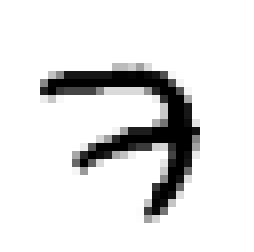

In [4]:
sample.show_image(image_data)

In [6]:
data = mnist.train.next_batch(500)[0]
data = np.reshape(data, [500, 28, 28, 1])
encoded = sample.encode(data)

In [9]:
generated = sample.model.generate(encoded)

In [10]:
print generated.shape

(500, 28, 28, 1)


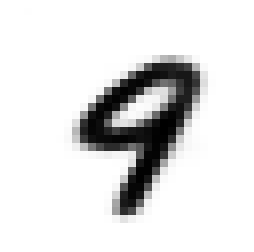

In [11]:
sample.show_image(generated[0])

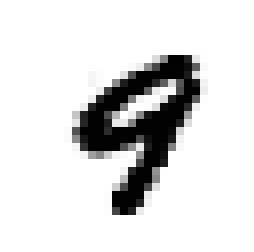

In [12]:
sample.show_image(data[0])

In [17]:
def visualize(i):
    real = data[i]
    fake = generated[i]
    sample.show_image(real)
    sample.show_image(fake)

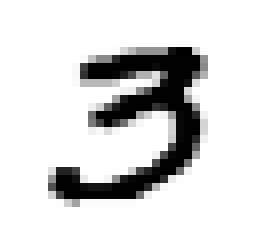

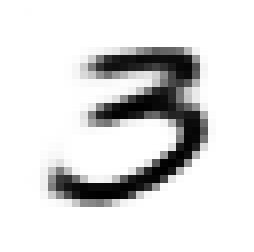

In [28]:
visualize(10)

In [31]:
z = np.random.normal(size=[500,sample.model.z_dim]).astype(np.float32)

In [32]:
print z.shape

(500, 100)


In [36]:
random_z = sample.model.generate(z)

In [37]:
print random_z.shape

(500, 28, 28, 1)


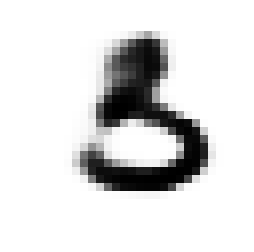

In [41]:
sample.show_image(random_z[3])